In [30]:
import pandas as pd

df = pd.read_csv('/content/merged.csv')

df['distance'] = df['distance'] / 1000

df.rename(columns={'name_x': 'name'}, inplace=True)
df.drop('name_y', axis=1, inplace=True)

In [31]:
df.head()

,way_id,distance,highway_type,name,total_nodes,total_intersections,major_intersections,max_node_degree,avg_node_degree,intersection_density,importance_weight,intersection_score,lanes,maxspeed,ped_distance,running_score
0,9965723,4.3455,secondary,Phố Tràng Tiền,6,1,0,3,2.17,0.167,6,4.35,2.0,NaN,0.00000,54
1,9978719,41.0341,primary,Đường Ngô Gia Tự,4,0,0,2,2.00,0.000,8,3.20,4.0,NaN,0.00000,58
2,10048345,36.5883,motorway,Đường cao tốc Nội Bài – Bắc Ninh,10,0,0,2,2.00,0.000,10,3.60,2.0,80.0,0.00000,39
3,10231739,5.2166,primary,Vòng xoay Cầu Chương Dương,10,0,0,2,2.00,0.000,8,3.20,2.0,NaN,9.71236,44
4,10232151,4.6258,primary,Đường Trần Quang Khải,12,0,0,2,2.00,0.000,8,3.20,4.0,NaN,0.00000,58


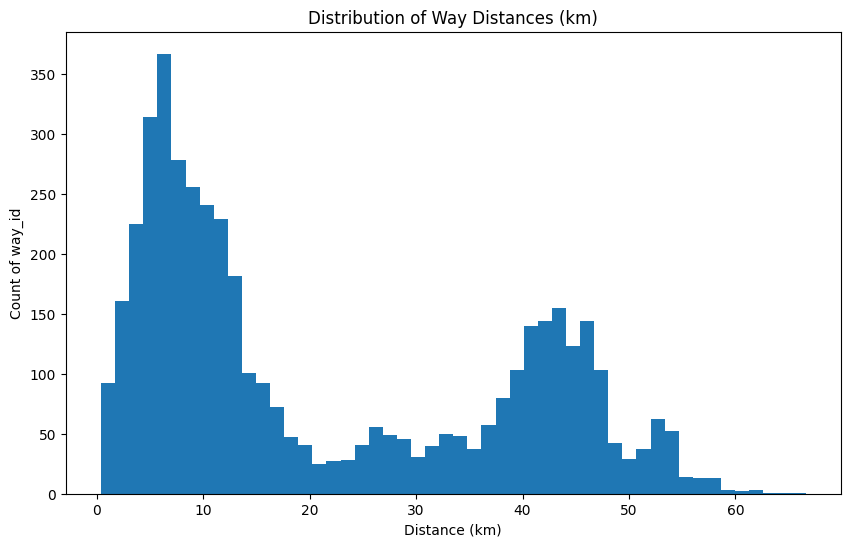

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['distance'], bins=50)
plt.title('Distribution of Way Distances (km)')
plt.xlabel('Distance (km)')
plt.ylabel('Count of way_id')
plt.show()

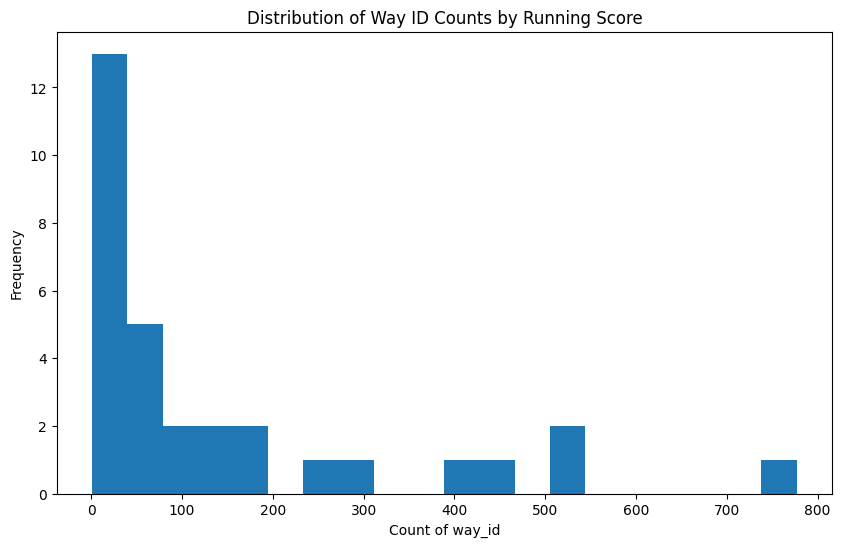

In [33]:
import matplotlib.pyplot as plt

score_counts = df.groupby('running_score')['way_id'].count()

plt.figure(figsize=(10, 6))
plt.hist(score_counts, bins=20)
plt.title('Distribution of Way ID Counts by Running Score')
plt.xlabel('Count of way_id')
plt.ylabel('Frequency')
plt.show()

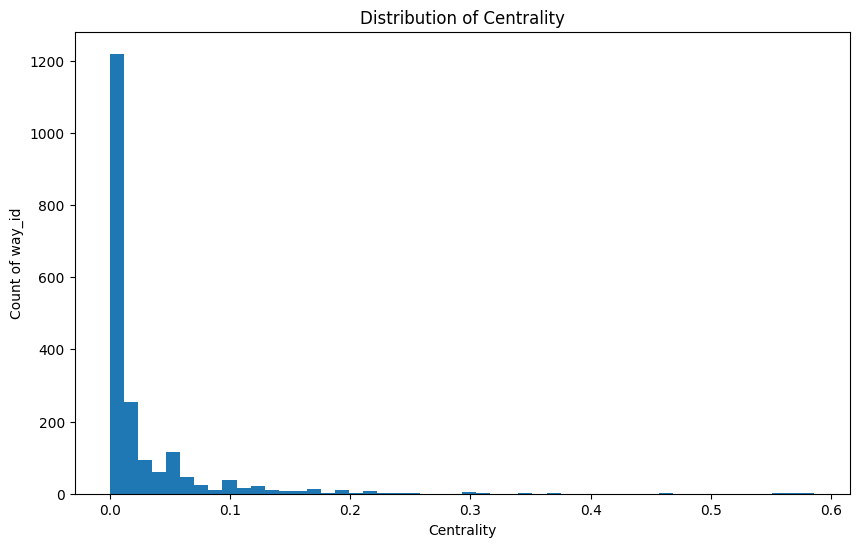

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the specified CSV file
centrality_df = pd.read_csv('/content/centrality.csv')

# Plot a histogram of the 'centrality' column
plt.figure(figsize=(10, 6))
plt.hist(centrality_df['centrality'], bins=50)
plt.title('Distribution of Centrality')
plt.xlabel('Centrality')
plt.ylabel('Count of way_id')
plt.show()

In [35]:
centrality_df['centrality'].describe()

,centrality
count,1974.000000
mean,0.025065
std,0.048655
min,0.000000
25%,0.002083
50%,0.006208
75%,0.023964
max,0.586076


In [48]:
name_way_df = df.groupby('name').agg({
    'way_id': lambda x: list(x),
    'distance': 'min',
    'highway_type': 'first',  # Keep the first value or use a custom rule
    'total_nodes': 'sum',
    'total_intersections': 'sum',
    'major_intersections': 'sum',
    'max_node_degree': 'max',
    'avg_node_degree': 'mean',
    'intersection_density': 'mean',
    'importance_weight': 'mean',
    'intersection_score': 'mean',
    'lanes': 'sum',
    'maxspeed': 'mean',
    'ped_distance': 'mean',
    'running_score': 'mean'
}).reset_index()

name_way_df.head(1)

,name,way_id,distance,highway_type,total_nodes,total_intersections,major_intersections,max_node_degree,avg_node_degree,intersection_density,importance_weight,intersection_score,lanes,maxspeed,ped_distance,running_score
0,An Thượng - Đông La,[814093251],18.9471,secondary,106,1,0,3,2.01,0.009,6.0,4.3,2.0,NaN,0.0,49.0


In [49]:
name_way_df.shape

(521, 16)

In [50]:
centrality_df.head(1)

,way_id,centrality
0,1330597818,0.586076


In [51]:
# --- Step 1: Explode way_ids into rows ---
df_exploded = name_way_df.explode('way_id')
df_exploded['way_id'] = df_exploded['way_id'].astype(int)

# --- Step 2: Merge with centrality values ---
merged = df_exploded.merge(centrality_df, on='way_id', how='left')

# --- Step 3: Compute average centrality per original row ---
avg_centrality = (
    merged.groupby(merged.index)['centrality']
    .max()
    .fillna(0)  # optional: fill missing with 0
    .rename('max_centrality')
)

# --- Step 4: Add avg_centrality back to original dataframe ---
name_way_df['max_centrality'] = avg_centrality

name_way_df.head(1)

,name,way_id,distance,highway_type,total_nodes,total_intersections,major_intersections,max_node_degree,avg_node_degree,intersection_density,importance_weight,intersection_score,lanes,maxspeed,ped_distance,running_score,max_centrality
0,An Thượng - Đông La,[814093251],18.9471,secondary,106,1,0,3,2.01,0.009,6.0,4.3,2.0,NaN,0.0,49.0,0.0


In [53]:
name_way_df[name_way_df['distance'] < 30].shape

(307, 17)

In [58]:
name_way_df[name_way_df['distance'] < 30]['highway_type'].value_counts()

,count
highway_type,
secondary,158
primary,144
motorway,5


In [59]:
name_way_df[name_way_df['distance'] < 30]['total_intersections'].describe()

,total_intersections
count,307.000000
mean,8.136808
std,38.508647
min,0.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,667.000000


In [62]:
name_way_df[(name_way_df['distance'] < 30) & (name_way_df['total_intersections'] > 8)].shape

(72, 17)

In [63]:
name_way_df[(name_way_df['distance'] < 30) & (name_way_df['total_intersections'] > 8)].head(1)

,name,way_id,distance,highway_type,total_nodes,total_intersections,major_intersections,max_node_degree,avg_node_degree,intersection_density,importance_weight,intersection_score,lanes,maxspeed,ped_distance,running_score,max_centrality
52,Cầu vượt nút giao Chùa Bộc - Phạm Ngọc Thạch,"[1107122299, 1107122300, 1107122301, 110712230...",4.7444,secondary,21,10,0,3,2.83,0.8308,6.0,5.55,6.0,30.0,5.192747,48.4,0.0
